In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


**Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Importing the dataset**

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
X = df.iloc[:,[2,3]].values
y = df.iloc[:, -1].values

**Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.20, random_state=0)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Fitting SVM to the Training set**

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

**Predicting the Test set results**

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
conf_matrix

array([[57,  1],
       [ 6, 16]])

**Visualising the Training set results**

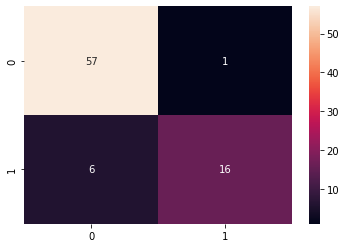

In [ ]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)
plt.show()

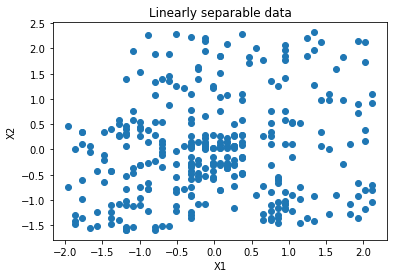

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel("X2")
plt.show()

In [ ]:
print('Accuracy:')
print((Y_test==y_pred).sum()/len(y_pred))

Accuracy:
0.9125


**Visualising the Test set results**

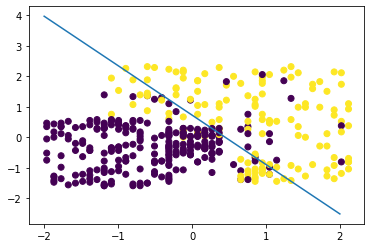

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1],c = y_pred)
plt.scatter(X_train[:,0],X_train[:,1],c = Y_train)
w = classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 2)
yy = a * xx - (classifier.intercept_[0]) / w[1]
plt.plot(xx, yy)
plt.show()